In [1]:
# Initial imports and notebook setup, click arrow to show
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK.utilities import plot_funcs_der, plot_funcs
import matplotlib.pyplot as plt
import numpy as np

mystr = lambda number: "{:.4f}".format(number)

In [2]:
CyclicalDict = {  # Click the arrow to expand this parameter dictionary
    # Parameters shared with the perfect foresight model
    "CRRA": 2.0,  # Coefficient of relative risk aversion
    "Rfree": 1.03,  # Interest factor on assets
    "DiscFac": 0.96,  # Intertemporal discount factor
    "LivPrb": 4 * [0.98],  # Survival probability
    "PermGroFac": [1.082251, 2.8, 0.3, 1.1],
    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd": [0.1, 0.1, 0.1, 0.1],
    "PermShkCount": 7,  # Number of points in discrete approximation to permanent income shocks
    "TranShkStd": [0.2, 0.2, 0.2, 0.2],
    "TranShkCount": 7,  # Number of points in discrete approximation to transitory income shocks
    "UnempPrb": 0.05,  # Probability of unemployment while working
    "IncUnemp": 0.3,  # Unemployment benefits replacement rate
    "UnempPrbRet": 0.0005,  # Probability of "unemployment" while retired
    "IncUnempRet": 0.0,  # "Unemployment" benefits when retired
    "T_retire": 0,  # Period of retirement (0 --> no retirement)
    "tax_rate": 0.0,  # Flat income tax rate (legacy parameter, will be removed in future)
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMin": 0.001,  # Minimum end-of-period "assets above minimum" value
    "aXtraMax": 20,  # Maximum end-of-period "assets above minimum" value
    "aXtraCount": 48,  # Number of points in the base grid of "assets above minimum"
    "aXtraNestFac": 3,  # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraExtra": [None],  # Additional values to add to aXtraGrid
    # A few other paramaters
    "BoroCnstArt": 0.0,  # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool": True,  # Whether to calculate the value function during solution
    "CubicBool": False,  # Preference shocks currently only compatible with linear cFunc
    "T_cycle": 4,  # Number of periods in the cycle for this agent type
    # Parameters only used in simulation
    "AgentCount": 10000,  # Number of agents of this type
    "T_sim": 120,  # Number of periods to simulate
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 1.0,  # Standard deviation of log initial assets
    "pLvlInitMean": 0.0,  # Mean of log initial permanent income
    "pLvlInitStd": 0.0,  # Standard deviation of log initial permanent income
    "PermGroFacAgg": 1.0,  # Aggregate permanent income growth factor
    "T_age": None,  # Age after which simulated agents are automatically killed
}

unpack_cFunc is deprecated and it will soon be removed, please use unpack('cFunc') instead.


Quarterly consumption functions:


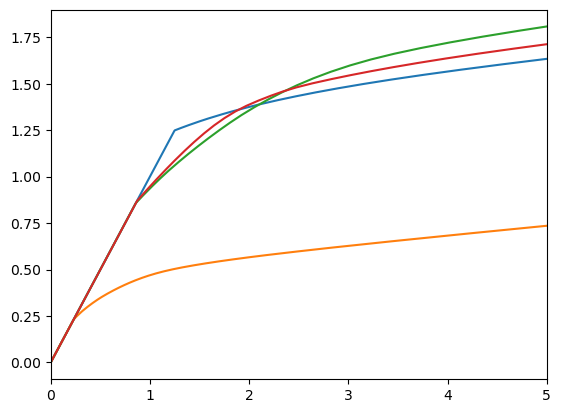

In [3]:
CyclicalExample = IndShockConsumerType(**CyclicalDict)
CyclicalExample.cycles = 0  # Make this consumer type have an infinite horizon
CyclicalExample.solve()

CyclicalExample.unpack_cFunc()
print("Quarterly consumption functions:")
mMin = min([X.mNrmMin for X in CyclicalExample.solution])
plot_funcs(CyclicalExample.cFunc, mMin, 5)

Quarterly consumption functions:


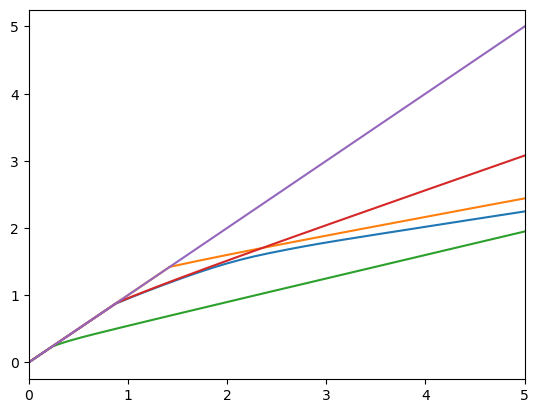

In [4]:
FiniteCyclicalDict = CyclicalDict.copy()
FiniteCyclicalDict["T_age"] = 60

FiniteCyclicalExample = IndShockConsumerType(**FiniteCyclicalDict)
# CyclicalExample.cycles = 0 # Make this consumer type have an infinite horizon
FiniteCyclicalExample.solve()

FiniteCyclicalExample.unpack("cFunc")
print("Quarterly consumption functions:")
mMin = min([X.mNrmMin for X in FiniteCyclicalExample.solution])
plot_funcs(FiniteCyclicalExample.cFunc, mMin, 5)

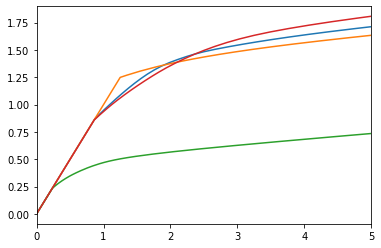